In [46]:
from nltk.corpus import wordnet as wn
import nltk

In [47]:
import os
import pickle
#import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [49]:
# Hyperparameters

#concreteness_threshold = 2
concreteness_threshold = 7

# Number of positive examples we want for each classifier
#pos_count = 3
#neg_count = 9
#pos_count = 10
#neg_count = 20
pos_count = 15
neg_count = 40


test_pct = 0.33 #0.33

embedding_file = 'ddata/clip.bertvocab.embeddings.513.txt'
embedding_pickle = 'ddata/clip.bertvocab.embeddings.513.pkl'
concreteness_file = 'ddata/AC_ratings_google3m_koeper_SiW.csv'
concreteness_pickle = 'ddata/AC_ratings_google3m_koeper_SiW.pkl'

In [50]:
# wac2vec

if os.path.isfile(embedding_pickle):
    wac2vec = pickle.load(open(embedding_pickle, 'rb'))
else:
    with open(embedding_file) as f:
        f = f.readlines()
        f = [line.split() for line in f]
        wac2vec = {line[0]:np.array(line[1:], dtype=np.float64) for line in f}
        pickle.dump(wac2vec, open(embedding_pickle, "wb" ))

len(wac2vec)

30522

In [57]:
# concr_scores

if os.path.isfile(concreteness_pickle):
    concr_scores = pickle.load(open(concreteness_pickle, 'rb'))
else:
    concr_scores = pd.read_csv(concreteness_file, delimiter='\t')
    concr_scores = concr_scores.dropna()
    concr_scores.WORD = concr_scores.WORD.apply(lambda x: x.replace("_", " "))
    concr_scores.index = concr_scores.WORD
    pickle.dump(concr_scores, open(concreteness_pickle, "wb" ))

len(concr_scores)

2168990

In [52]:
X_features = []
for word in list(wac2vec.keys())[7000:7600]:
    X_features.append(wac2vec[word])

In [53]:
# Test ConcreteAbstract Class

In [58]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
%autoreload 2

In [60]:
from concreteabstract import ConcreteAbstract

In [61]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn)
ca.init_abstraction_tree(min_rating=9)
ca.grow_abstraction_tree()

  0%|          | 0/14510 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [13]:
#ca.build_display_tree(wn.synset('entity.n.01'), char_limit=5)

In [14]:
ca.add_pos_neg_all()

  0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
ca.fill_out_train_test()

  0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
ca.build_classifiers()

  0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
ca.comp_random_baseline()

0.5

In [18]:
ca.comp_most_common_baseline()

0.5945945945945946

In [19]:
ca.evaluate_vs_negative_examples()

0.7083333333333334

In [20]:
score, rand_baseline = ca.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

  0%|          | 0/4 [00:00<?, ?it/s]

score:     0.9333333333333333
baseline:  0.6


In [21]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=10, neg_count=20)

In [22]:
ca.build_all(min_rating=8, test_pct=0.3, verbose=True)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/343 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/37 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/37 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
ca.export_embeddings('ddata/new_embeddings')

In [ ]:
# Let's find a good set of hyperparameters

In [ ]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=5, neg_count=20)
ca.build_all(min_rating=5, test_pct=0.3, verbose=True)
score, rand_baseline = ca.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

In [ ]:
ca.export_embeddings('ddata/new_embeddings')

In [ ]:
ca2 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca2.build_all(min_rating=4, test_pct=0.3, verbose=True)
score, rand_baseline = ca2.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

In [ ]:
ca3 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca3.build_all(min_rating=4, test_pct=0, verbose=True)

In [ ]:
ca3.export_embeddings('ddata/new_embeddings')

In [ ]:
ca4 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca4.build_all(min_rating=2, test_pct=0.3, verbose=True)
score, rand_baseline = ca2.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

In [ ]:
ca5 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca5.build_all(min_rating=2, test_pct=0, verbose=True)

In [ ]:
ca5.export_embeddings('ddata/new_embeddings')

In [ ]:
ca7 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=8, neg_count=15)
ca7.build_all(min_rating=2, test_pct=0, verbose=True)

In [ ]:
ca7.export_embeddings('ddata/new_embeddings')

In [ ]:
# Visualize 2D

In [33]:
def visual_get_categories(ca, start_ss, depth=1):
    hypos = ca.abstraction_tree.loc[start_ss, 'HYPONYMS']
    if depth <= 0:
        return hypos
    
    ret = []
    for h in hypos:
        ret = ret + visual_get_categories(ca, h, depth-1)
    return ret

def get_offspring(ca, parent_ss):
    offspring = []
    absraction_levels = []
    hypos = ca.abstraction_tree.loc[parent_ss, 'HYPONYMS']
    emb = ca.abstraction_tree.loc[parent_ss, 'EMBEDDING']
    a_level = ca.abstraction_tree.loc[parent_ss, 'DIST2LEAF']

    #print(parent_ss)
    #print(emb)
    #print(hypos)
    if emb is not None:
        offspring.append(emb)
        absraction_levels.append(a_level)
    for ss in hypos:
        off, a_level = get_offspring(ca, ss)
        offspring += off
        absraction_levels += a_level
    return offspring, absraction_levels

def visual_get_X_features(ca, ss_list):
    X_features = []
    X_colors = []
    for i, parent_ss in enumerate(ss_list):
        #print(i)
        offspring, a_levels = get_offspring(ca, parent_ss)
        X_features += offspring
        #X_colors += [i]*len(offspring)
        X_colors += a_levels
    
    return X_features, X_colors

In [ ]:
visual_categories = visual_get_categories(ca7, wn.synset('entity.n.01'), 2)
X_features, X_colors = visual_get_X_features(ca7, visual_categories)
print(len(X_features), len(X_colors))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pca2 = PCA(n_components=368)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,105], c=X_colors)
plt.show()

In [ ]:
# Average Exploration

In [85]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn)
ca.init_abstraction_tree(min_rating=5)
ca.grow_abstraction_tree()

  0%|          | 0/14510 [00:00<?, ?it/s]

  0%|          | 0/3605 [00:00<?, ?it/s]

In [86]:
ca.build_average_embeddings()

  0%|          | 0/2827 [00:00<?, ?it/s]

In [87]:
ca.average_embedding_count()

2827

In [26]:
ca.abstraction_tree

,SYNSET,WORD,DIST2LEAF,NUM_LEAVES,HYPERNYM,HYPONYMS,EMBEDDING
SYNSET,,,,,,,
Synset('tracker.n.01'),Synset('tracker.n.01'),tracker,0,1,[Synset('hunter.n.01')],[],"[0.05986997594351885, 0.04477477263618056, 0.0..."
Synset('banana.n.01'),Synset('banana.n.01'),banana,0,1,[Synset('herb.n.01')],[],"[0.05985448005640845, 0.030340837990694418, -0..."
Synset('wrapping.n.01'),Synset('wrapping.n.01'),wrapping,0,1,[Synset('covering.n.02')],[],"[0.01929052366807369, -0.04730167679343691, -0..."
Synset('figure.n.01'),Synset('figure.n.01'),fig,0,1,[Synset('illustration.n.01')],[],"[-0.35038071623274214, -0.18741347667293456, -..."
Synset('outskirts.n.01'),Synset('outskirts.n.01'),outskirts,0,1,[Synset('section.n.03')],[],"[0.02815745105900946, 0.16541310872338838, 0.1..."
...,...,...,...,...,...,...,...
Synset('material_resource.n.01'),Synset('material_resource.n.01'),None,5,1,[Synset('assets.n.01')],[Synset('wealth.n.03')],"[0.1253269690484357, -0.026361485874611238, 0...."
Synset('charge.n.08'),Synset('charge.n.08'),None,5,1,[Synset('liabilities.n.01')],[Synset('levy.n.01')],"[-0.1015565007769945, 0.09771269013708984, -0...."
Synset('react.v.01'),Synset('react.v.01'),None,5,1,[Synset('act.v.01')],[Synset('accept.v.03')],"[-0.17041495578349733, 0.06358745190850727, -0..."


In [41]:
#visual_categories = visual_get_categories(ca, wn.synset('entity.n.01'), 2)
visual_categories = visual_get_categories(ca, wn.synset('animal.n.01'), 2)
X_features, X_colors = visual_get_X_features(ca, visual_categories)
print(len(X_features), len(X_colors))

212 212


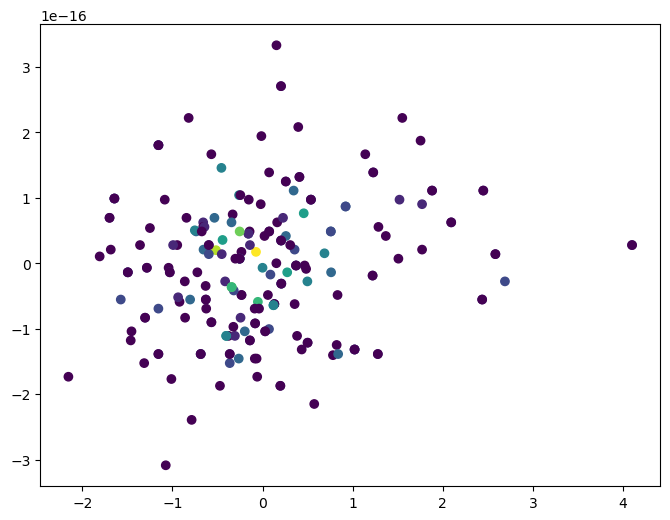

In [45]:
pca = PCA(n_components=212)
pca.fit(X_features)
x_3d = pca.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,211], c=X_colors)
plt.show()

In [88]:
at = ca.abstraction_tree

In [89]:
words = [w for w in at['WORD'] if w is not None]

In [90]:
len(words)

3605

In [92]:
for w in words:
    if concr_scores.loc[w]['RATING'] < 6:
        print(w)

tracker
wrapping
outskirts
slicing
melted
diva
rehearsal
orphan
north
letterman
papa
sarah
metropolis
idaho
vomiting
dodge
niagara
yankee
baba
reagan
vortex
graduate
jew
pinched
flowering
freeze
wilderness
perry
bruce
superintendent
bedside
revue
woven
bony
sentinel
orgasm
ghost
blowing
west
slaughter
tubular
squad
piercing
mayer
swarm
mobile
pinning
smoky
sniff
companion
downstream
buyer
stephen
psalm
crash
giant
ace
hometown
norfolk
beat
johnson
york
telecast
mao
priestess
mohammed
hydra
sermon
mack
adjutant
edmonton
quartermaster
secretary
trim
ride
biographer
champion
doubles
excavation
utah
posterior
avenue
spill
corona
miller
touch
purple
ventilation
uniformed
coordinator
brooklyn
nightfall
schedule
panzer
aboard
licked
vane
palmer
strike
plymouth
chorus
membrane
space
memoir
punjabi
gig
greenwood
crawford
vista
auditor
taxpayer
carmine
slash
cody
press
pali
bradford
gap
stabbing
jacob
nap
crawling
arc
survivor
sliding
timer
tribe
townspeople
glint
mounted
collins
armchair
transc

KeyboardInterrupt: 